In [1]:
# 0.필요모듈 import
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans



In [2]:
# 1. 데이터셋 로드 (csv -> dataframe)
# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('DataSet/sales_data.csv', index_col=['customer_id'])
sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


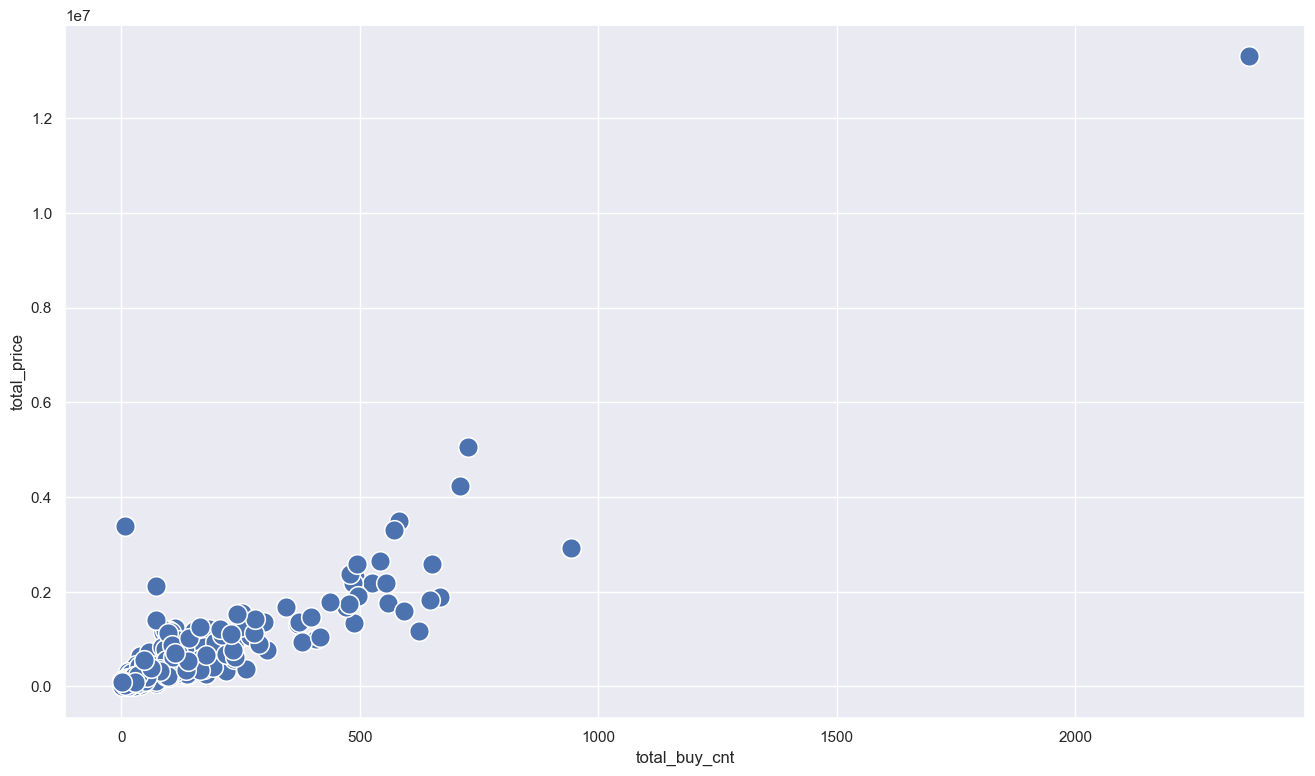

In [3]:
# 2. 데이터셋 시각화  (클러스터링 전)
sns.set(style='darkgrid',
        rc={'figure.figsize':(16, 9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

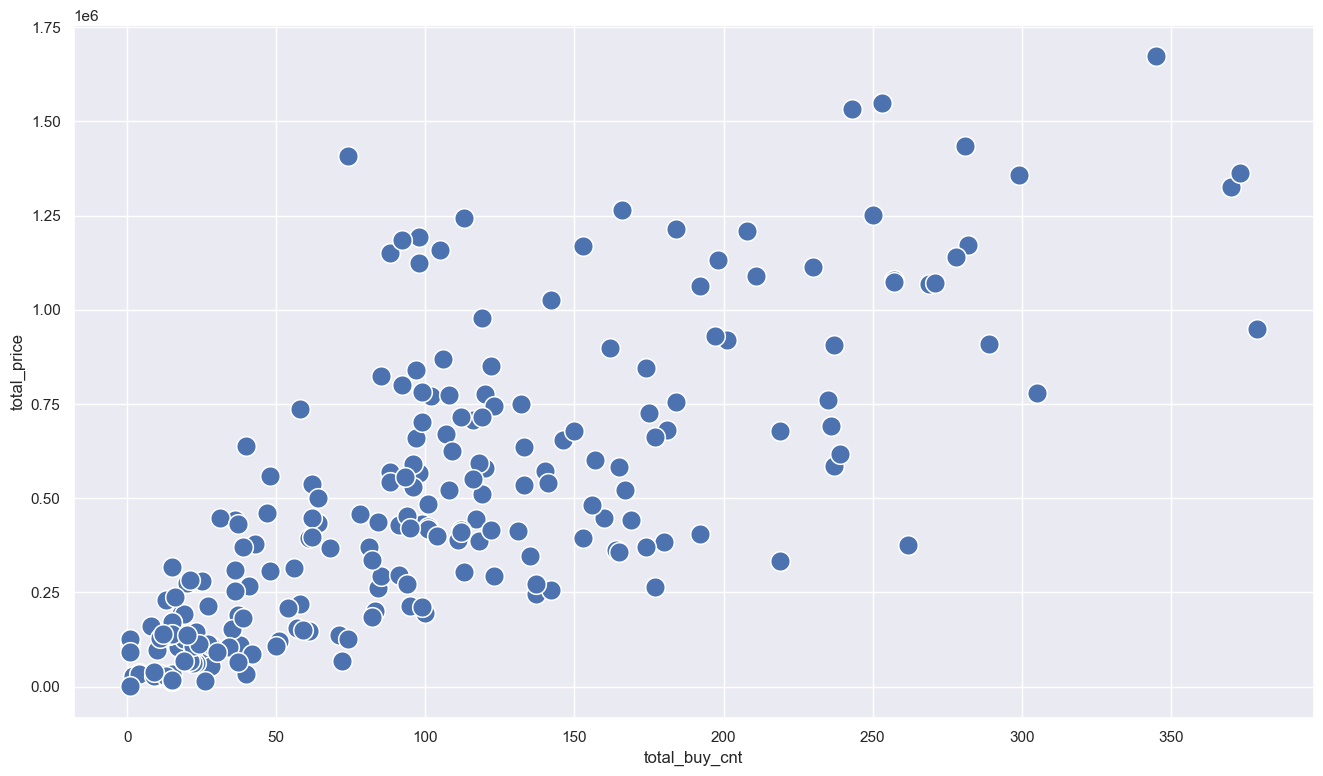

In [4]:
# 3. 제이터 이상치 제거 
# IQR 방법 사용
def get_outlier_mask(df, weight=1.5):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight

    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)

    return is_outlier

outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04


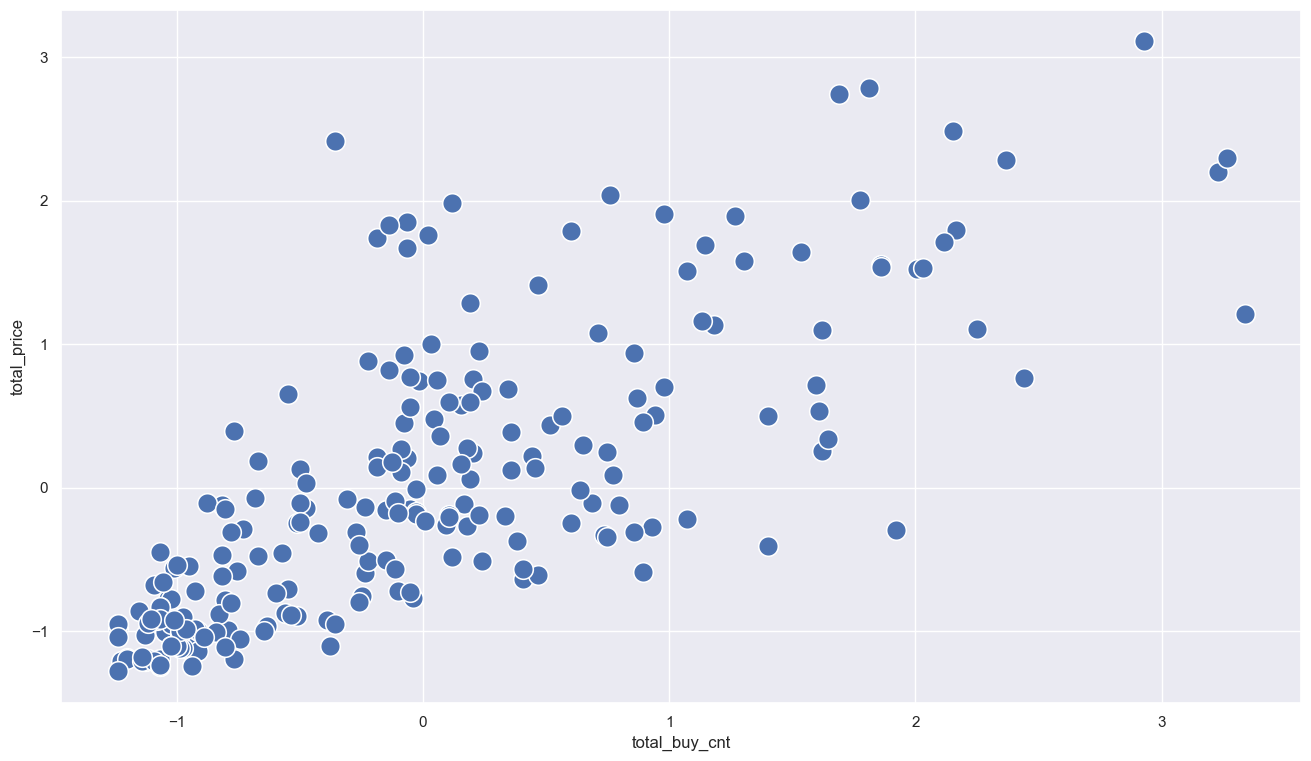

In [5]:
# 4. 데이터 표준화 (Stanardization)
df_mean = sales_df.mean()  # 각 컬럼의 평균값
df_std = sales_df.std()  # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std  # 컬럼별 표준화 진행 

scaled_df.columns = ['total_buy_cnt', 'total_price']


# 인덱스 설정
scaled_df.index = sales_df.index 

# 아웃라이어 제거한 표준화 데이터프레임 시각화
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], s=200)
scaled_df


In [6]:
# 5. 클러스터링 모델 선언 및 학습 (k-means)
model = KMeans(n_clusters=2, random_state=123)
model.fit(scaled_df)

# inertia (각 centroid 와 데이터 사이의 거리제곱의 총 합)값 확인
print(model.inertia_)

187.06526917589167


In [7]:
# 6. 클러스터 시각화
# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)

scaled_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.05,-0.15,0
12427,-0.07,0.21,0
12431,0.23,0.95,1
12471,-1.13,-1.02,0
12472,-0.19,0.21,0
...,...,...,...
18144,-0.89,-1.04,0
18168,1.69,2.74,1
18225,-1.24,-1.04,0


In [8]:
# 각 군집의 중심점
centers = model.cluster_centers_
scaled_df['label'].value_counts()

0    141
1     84
Name: label, dtype: int64

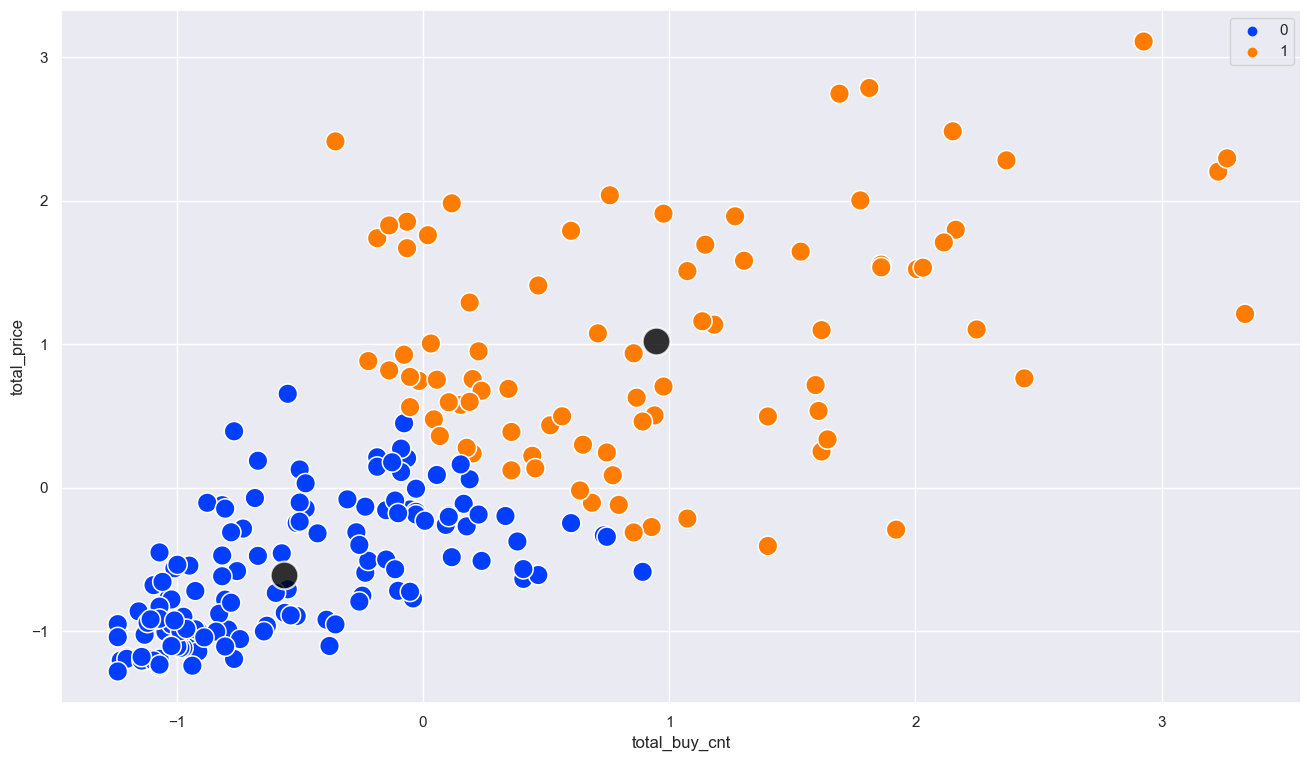

In [9]:
sns.scatterplot(x=scaled_df['total_buy_cnt'], y=scaled_df['total_price'], hue=scaled_df['label'], s=200, palette='bright')
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=400)